In [29]:
import cv2
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Function to resize and pad the image
def resize_and_pad(image, scale_factor=0.5):
    height, width, channels = image.shape
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Calculate the padding required to maintain the original aspect ratio
    pad_height = (height - new_height) // 2
    pad_width = (width - new_width) // 2

    # Create a new padded image with the same size as the original image
    padded_image = np.zeros((height, width, channels), dtype=np.uint8)

    # Paste the resized image onto the padded image
    padded_image[pad_height:pad_height+new_height, pad_width:pad_width+new_width] = resized_image

    return padded_image

# Modify the training and test data
x_train_modified = np.array([resize_and_pad(image) for image in x_train])
x_test_modified = np.array([resize_and_pad(image) for image in x_test])

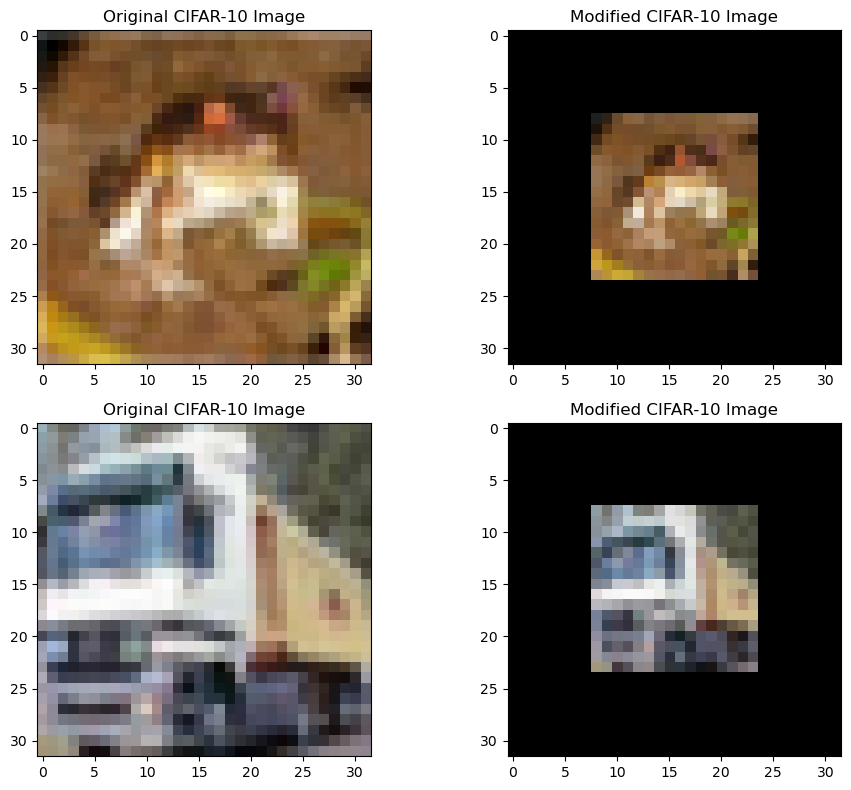

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Function to resize and pad the image
def resize_and_pad(image, scale_factor=0.51):
    height, width, channels = image.shape
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Calculate the padding required to maintain the original aspect ratio
    pad_height = (height - new_height) // 2
    pad_width = (width - new_width) // 2

    # Create a new padded image with the same size as the original image
    padded_image = np.zeros((height, width, channels), dtype=np.uint8)

    # Paste the resized image onto the padded image
    padded_image[pad_height:pad_height+new_height, pad_width:pad_width+new_width] = resized_image

    return padded_image

# Modify the training and test data
x_train_modified = np.array([resize_and_pad(image) for image in x_train])
x_test_modified = np.array([resize_and_pad(image) for image in x_test])

# Visualize the original and modified images
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Original CIFAR-10 image
axes[0, 0].imshow(x_train[0])
axes[0, 0].set_title('Original CIFAR-10 Image')

# Modified CIFAR-10 image
axes[0, 1].imshow(x_train_modified[0])
axes[0, 1].set_title('Modified CIFAR-10 Image')

# Original CIFAR-10 image
axes[1, 0].imshow(x_train[1])
axes[1, 0].set_title('Original CIFAR-10 Image')

# Modified CIFAR-10 image
axes[1, 1].imshow(x_train_modified[1])
axes[1, 1].set_title('Modified CIFAR-10 Image')

plt.tight_layout()
plt.show()

In [37]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Modify the training and test data
def resize_and_pad(image, scale_factor=0.51):
    height, width, channels = image.shape
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Calculate the padding required to maintain the original aspect ratio
    pad_height = (height - new_height) // 2
    pad_width = (width - new_width) // 2

    # Create a new padded image with the same size as the original image
    padded_image = np.zeros((height, width, channels), dtype=np.uint8)

    # Paste the resized image onto the padded image
    padded_image[pad_height:pad_height+new_height, pad_width:pad_width+new_width] = resized_image

    return padded_image

# Modify the training and test data
x_train_modified = np.array([resize_and_pad(image) for image in x_train])
x_test_modified = np.array([resize_and_pad(image) for image in x_test])

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train_modified = x_train_modified / 255.0
x_test_modified = x_test_modified / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the original CIFAR-10 dataset
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model on the original CIFAR-10 dataset
original_on_original_scores = model.evaluate(x_test, y_test, verbose=0)
print(f'Model trained on original, tested on original CIFAR-10 test accuracy: {original_on_original_scores[1] * 100:.2f}%')

# Evaluate the model on the modified CIFAR-10 dataset
original_on_modified_scores = model.evaluate(x_test_modified, y_test, verbose=0)
print(f'Model trained on original, tested on modified CIFAR-10 test accuracy: {original_on_modified_scores[1] * 100:.2f}%')

# Train a new model on the modified CIFAR-10 dataset
model_modified = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_modified.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model_modified.fit(x_train_modified, y_train, epochs=10, batch_size=32, validation_data=(x_test_modified, y_test))

# Evaluate the modified model on the original CIFAR-10 dataset
modified_on_original_scores = model_modified.evaluate(x_test, y_test, verbose=0)
print(f'Model trained on modified, tested on original CIFAR-10 test accuracy: {modified_on_original_scores[1] * 100:.2f}%')

# Evaluate the modified model on the modified CIFAR-10 dataset
modified_on_modified_scores = model_modified.evaluate(x_test_modified, y_test, verbose=0)
print(f'Model trained on modified, tested on modified CIFAR-10 test accuracy: {modified_on_modified_scores[1] * 100:.2f}%')

Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.5930 - accuracy: 0.4185 - val_loss: 1.2310 - val_accuracy: 0.5624
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.2653 - accuracy: 0.5521 - val_loss: 1.0614 - val_accuracy: 0.6220
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1300 - accuracy: 0.6032 - val_loss: 0.9668 - val_accuracy: 0.6625
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0453 - accuracy: 0.6322 - val_loss: 0.9449 - val_accuracy: 0.6650
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9787 - accuracy: 0.6557 - val_loss: 0.9070 - val_accuracy: 0.6837
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9230 - accuracy: 0.6750 - val_loss: 0.8834 - val_accuracy: 0.6928
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8761 - accuracy: 0.6921 - val_loss: 0.9076 -

In [3]:
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Modify the training and test data
def resize_and_pad(image, scale_factor=0.51):
    height, width, channels = image.shape
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Calculate the padding required to maintain the original aspect ratio
    pad_height = (height - new_height) // 2
    pad_width = (width - new_width) // 2

    # Create a new padded image with the same size as the original image
    padded_image = np.zeros((height, width, channels), dtype=np.uint8)

    # Paste the resized image onto the padded image
    padded_image[pad_height:pad_height+new_height, pad_width:pad_width+new_width] = resized_image

    return padded_image

# Modify the training and test data
x_train_modified = np.array([resize_and_pad(image) for image in x_train])
x_test_modified = np.array([resize_and_pad(image) for image in x_test])

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train_modified = x_train_modified / 255.0
x_test_modified = x_test_modified / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the original CIFAR-10 dataset
model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate the model on the original CIFAR-10 dataset
original_on_original_scores = model.evaluate(x_test, y_test, verbose=0)
print(f'Model trained on original, tested on original CIFAR-10 test accuracy: {original_on_original_scores[1] * 100:.2f}%')

# Evaluate the model on the modified CIFAR-10 dataset
original_on_modified_scores = model.evaluate(x_test_modified, y_test, verbose=0)
print(f'Model trained on original, tested on modified CIFAR-10 test accuracy: {original_on_modified_scores[1] * 100:.2f}%')

# Train a new model on the modified CIFAR-10 dataset
model_modified = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_modified.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model_modified.fit(x_train_modified, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate the modified model on the original CIFAR-10 dataset
modified_on_original_scores = model_modified.evaluate(x_test, y_test, verbose=0)
print(f'Model trained on modified, tested on original CIFAR-10 test accuracy: {modified_on_original_scores[1] * 100:.2f}%')

# Evaluate the modified model on the modified CIFAR-10 dataset
modified_on_modified_scores = model_modified.evaluate(x_test_modified, y_test, verbose=0)
print(f'Model trained on modified, tested on modified CIFAR-10 test accuracy: {modified_on_modified_scores[1] * 100:.2f}%')



Epoch 1/100


625/625 [==============================] - 13s 19ms/step - loss: 1.6677 - accuracy: 0.3869 - val_loss: 1.3908 - val_accuracy: 0.4948
Epoch 2/100
625/625 [==============================] - 12s 18ms/step - loss: 1.3140 - accuracy: 0.5266 - val_loss: 1.2271 - val_accuracy: 0.5664
Epoch 3/100
625/625 [==============================] - 12s 18ms/step - loss: 1.1626 - accuracy: 0.5886 - val_loss: 1.1474 - val_accuracy: 0.5943
Epoch 4/100
625/625 [==============================] - 11s 18ms/step - loss: 1.0483 - accuracy: 0.6315 - val_loss: 1.0177 - val_accuracy: 0.6428
Epoch 5/100
625/625 [==============================] - 12s 18ms/step - loss: 0.9697 - accuracy: 0.6608 - val_loss: 1.0134 - val_accuracy: 0.6483
Epoch 6/100
625/625 [==============================] - 11s 18ms/step - loss: 0.9190 - accuracy: 0.6787 - val_loss: 0.9603 - val_accuracy: 0.6666
Epoch 7/100
625/625 [==============================] - 11s 18ms/step - loss: 0.8560 - accuracy: 0.7019 - val_loss: 1.0114 - va

In [15]:
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Modify the training and test data
def resize_and_pad(image, scale_factor=0.51):
    height, width, channels = image.shape
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Calculate the padding required to maintain the original aspect ratio
    pad_height = (height - new_height) // 2
    pad_width = (width - new_width) // 2

    # Create a new padded image with the same size as the original image
    padded_image = np.zeros((height, width, channels), dtype=np.uint8)

    # Paste the resized image onto the padded image
    padded_image[pad_height:pad_height+new_height, pad_width:pad_width+new_width] = resized_image

    return padded_image

# Modify the training and test data
x_train_modified = np.array([resize_and_pad(image) for image in x_train])
x_test_modified = np.array([resize_and_pad(image) for image in x_test])

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train_modified = x_train_modified / 255.0
x_test_modified = x_test_modified / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Concatenate the original and modified data
x_train_combined = np.concatenate((x_train, x_train_modified), axis=0)
y_train_combined = np.concatenate((y_train, y_train), axis=0)

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the combined dataset
model.fit(x_train_combined, y_train_combined, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate the model on the original CIFAR-10 dataset
original_on_original_scores = model.evaluate(x_test, y_test, verbose=0)
print(f'Model trained on combined, tested on original CIFAR-10 test accuracy: {original_on_original_scores[1] * 100:.2f}%')

# Evaluate the model on the modified CIFAR-10 dataset
original_on_modified_scores = model.evaluate(x_test_modified, y_test, verbose=0)
print(f'Model trained on combined, tested on modified CIFAR-10 test accuracy: {original_on_modified_scores[1] * 100:.2f}%')


Epoch 1/100
1250/1250 [==============================] - 26s 18ms/step - loss: 1.5671 - accuracy: 0.4294 - val_loss: 1.4762 - val_accuracy: 0.4692
Epoch 2/100
1250/1250 [==============================] - 22s 18ms/step - loss: 1.2433 - accuracy: 0.5591 - val_loss: 1.2668 - val_accuracy: 0.5458
Epoch 3/100
1250/1250 [==============================] - 22s 17ms/step - loss: 1.0963 - accuracy: 0.6114 - val_loss: 1.1648 - val_accuracy: 0.5832
Epoch 4/100
1250/1250 [==============================] - 22s 18ms/step - loss: 0.9909 - accuracy: 0.6509 - val_loss: 1.1368 - val_accuracy: 0.5978
Epoch 5/100
1250/1250 [==============================] - 23s 18ms/step - loss: 0.9203 - accuracy: 0.6747 - val_loss: 1.0877 - val_accuracy: 0.6169
Epoch 6/100
1250/1250 [==============================] - 22s 17ms/step - loss: 0.8635 - accuracy: 0.6977 - val_loss: 1.0274 - val_accuracy: 0.6408
Epoch 7/100
1250/1250 [==============================] - 23s 18ms/step - loss: 0.8195 - accuracy: 0.7113 - val_loss: 1

In [1]:
#Tensorflow implementation on ResNet-50
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Modify the training and test data
def resize_and_pad(image, scale_factor=0.51):
    height, width, channels = image.shape
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Calculate the padding required to maintain the original aspect ratio
    pad_height = (height - new_height) // 2
    pad_width = (width - new_width) // 2

    # Create a new padded image with the same size as the original image
    padded_image = np.zeros((height, width, channels), dtype=np.uint8)

    # Paste the resized image onto the padded image
    padded_image[pad_height:pad_height+new_height, pad_width:pad_width+new_width] = resized_image

    return padded_image

# Modify the training and test data
x_train_modified = np.array([resize_and_pad(image) for image in x_train])
x_test_modified = np.array([resize_and_pad(image) for image in x_test])

# Preprocess the data
x_train = preprocess_input(x_train.astype(np.float32))
x_test = preprocess_input(x_test.astype(np.float32))
x_train_modified = preprocess_input(x_train_modified.astype(np.float32))
x_test_modified = preprocess_input(x_test_modified.astype(np.float32))

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Concatenate the original and modified data
x_train_combined = np.concatenate((x_train, x_train_modified), axis=0)
y_train_combined = np.concatenate((y_train, y_train), axis=0)

# Load ResNet-50 pre-trained model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add new top layers
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the combined dataset
model.fit(x_train_combined, y_train_combined, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the original CIFAR-10 dataset
original_on_original_scores = model.evaluate(x_test, y_test, verbose=0)
print(f'Model trained on combined, tested on original CIFAR-10 test accuracy: {original_on_original_scores[1] * 100:.2f}%')

# Evaluate the model on the modified CIFAR-10 dataset
original_on_modified_scores = model.evaluate(x_test_modified, y_test, verbose=0)
print(f'Model trained on combined, tested on modified CIFAR-10 test accuracy: {original_on_modified_scores[1] * 100:.2f}%')





Epoch 1/10


1250/1250 [==============================] - 1469s 1s/step - loss: 1.4490 - accuracy: 0.5063 - val_loss: 2.3068 - val_accuracy: 0.1037
Epoch 2/10
1250/1250 [==============================] - 1445s 1s/step - loss: 1.1763 - accuracy: 0.5929 - val_loss: 4.0662 - val_accuracy: 0.1435
Epoch 3/10
1250/1250 [==============================] - 1429s 1s/step - loss: 1.1886 - accuracy: 0.5868 - val_loss: 2.3006 - val_accuracy: 0.3131
Epoch 4/10
1250/1250 [==============================] - 1425s 1s/step - loss: 1.2364 - accuracy: 0.5687 - val_loss: 2.0075 - val_accuracy: 0.2472
Epoch 5/10
1250/1250 [==============================] - 1420s 1s/step - loss: 1.1258 - accuracy: 0.6103 - val_loss: 1.2610 - val_accuracy: 0.5521
Epoch 6/10
1250/1250 [==============================] - 1427s 1s/step - loss: 1.1281 - accuracy: 0.6127 - val_loss: 1.6577 - val_accuracy: 0.4015
Epoch 7/10
1250/1250 [==============================] - 1501s 1s/step - loss: 1.1050 - accuracy: 0.6231 - val_loss: 1.5

In [1]:
#Pytorch Implementation on ResNet-18

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import cv2
from torchvision import models
from torch.utils.data import DataLoader, Dataset

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Function to modify the training and test data
def resize_and_pad(image, scale_factor=0.50):
    image = image.numpy().transpose((1, 2, 0))  # Convert to HWC
    height, width, channels = image.shape
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Calculate the padding required to maintain the original aspect ratio
    pad_height = (height - new_height) // 2
    pad_width = (width - new_width) // 2

    # Create a new padded image with the same size as the original image
    padded_image = np.zeros((height, width, channels), dtype=np.uint8)

    # Paste the resized image onto the padded image
    padded_image[pad_height:pad_height+new_height, pad_width:pad_width+new_width] = resized_image

    # Convert back to CHW
    padded_image = padded_image.transpose((2, 0, 1))
    return torch.tensor(padded_image, dtype=torch.float32)

class ModifiedCIFAR10(Dataset):
    def __init__(self, dataset, transform=None, modified=False):
        self.dataset = dataset
        self.transform = transform
        self.modified = modified

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        img, label = self.dataset[idx]
        if self.modified:
            img = resize_and_pad(img)
            img = img / 255.0  # Normalize to [0, 1]
            img = transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))(img)
        if self.transform:
            img = self.transform(img)
        return img, label

# Create datasets
trainset_modified = ModifiedCIFAR10(trainset, transform=None, modified=True)
testset_modified = ModifiedCIFAR10(testset, transform=None, modified=True)

# Data loaders
trainloader = DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
trainloader_modified = DataLoader(trainset_modified, batch_size=64, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)
testloader_modified = DataLoader(testset_modified, batch_size=64, shuffle=False, num_workers=2)

# Define the model
def build_model():
    model = models.resnet18(pretrained=False)
    model.fc = nn.Linear(model.fc.in_features, 10)
    return model

# Training function
def train_model(model, trainloader, criterion, optimizer, num_epochs=1):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.cuda(), labels.cuda()
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")

# Evaluation function
def evaluate_model(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.cuda(), labels.cuda()
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Train model on the original CIFAR-10 dataset
model_original = build_model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_original.parameters(), lr=0.001)
train_model(model_original, trainloader, criterion, optimizer, num_epochs=1)

# Train model on the modified CIFAR-10 dataset
model_modified = build_model().to(device)
train_model(model_modified, trainloader_modified, criterion, optimizer, num_epochs=1)

# Evaluate the models
original_on_original_acc = evaluate_model(model_original, testloader)
print(f'Model trained on original, tested on original CIFAR-10 test accuracy: {original_on_original_acc:.2f}%')

original_on_modified_acc = evaluate_model(model_original, testloader_modified)
print(f'Model trained on original, tested on modified CIFAR-10 test accuracy: {original_on_modified_acc:.2f}%')

modified_on_original_acc = evaluate_model(model_modified, testloader)
print(f'Model trained on modified, tested on original CIFAR-10 test accuracy: {modified_on_original_acc:.2f}%')

modified_on_modified_acc = evaluate_model(model_modified, testloader_modified)
print(f'Model trained on modified, tested on modified CIFAR-10 test accuracy: {modified_on_modified_acc:.2f}%')


Files already downloaded and verified
Files already downloaded and verified


c:\Users\d4\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\d4\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1, Loss: 1.382615304282864


In [11]:
#Tensorflow implementation on ResNet-101
import tensorflow as tf
import keras
import numpy as np
import cv2
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import ResNet101
from tensorflow.keras.applications import ResNet101
from keras.applications.resnet import preprocess_input

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Modify the training and test data
def resize_and_pad(image, scale_factor=0.51):
    height, width, channels = image.shape
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Calculate the padding required to maintain the original aspect ratio
    pad_height = (height - new_height) // 2
    pad_width = (width - new_width) // 2

    # Create a new padded image with the same size as the original image
    padded_image = np.zeros((height, width, channels), dtype=np.uint8)

    # Paste the resized image onto the padded image
    padded_image[pad_height:pad_height+new_height, pad_width:pad_width+new_width] = resized_image

    return padded_image

# Modify the training and test data
x_train_modified = np.array([resize_and_pad(image) for image in x_train])
x_test_modified = np.array([resize_and_pad(image) for image in x_test])

# Preprocess the data
x_train = preprocess_input(x_train.astype(np.float32))
x_test = preprocess_input(x_test.astype(np.float32))
x_train_modified = preprocess_input(x_train_modified.astype(np.float32))
x_test_modified = preprocess_input(x_test_modified.astype(np.float32))

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Concatenate the original and modified data
x_train_combined = np.concatenate((x_train, x_train_modified), axis=0)
y_train_combined = np.concatenate((y_train, y_train), axis=0)

# Load ResNet-50 pre-trained model without the top layer
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add new top layers
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the combined dataset
model.fit(x_train_combined, y_train_combined, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the original CIFAR-10 dataset
original_on_original_scores = model.evaluate(x_test, y_test, verbose=0)
print(f'Model trained on combined, tested on original CIFAR-10 test accuracy: {original_on_original_scores[1] * 100:.2f}%')

# Evaluate the model on the modified CIFAR-10 dataset
original_on_modified_scores = model.evaluate(x_test_modified, y_test, verbose=0)
print(f'Model trained on combined, tested on modified CIFAR-10 test accuracy: {original_on_modified_scores[1] * 100:.2f}%')




171446536/171446536 [==============================] - 16s 0us/step
Epoch 1/10


 171/1250 [===>..........................] - ETA: 37:40 - loss: 2.0129 - accuracy: 0.3169

KeyboardInterrupt: 

Epoch 1/10
625/625 [==============================] - 776s 1s/step - loss: 2.0127 - accuracy: 0.2602 - val_loss: 2.2221 - val_accuracy: 0.1653
Epoch 2/10
625/625 [==============================] - 748s 1s/step - loss: 1.6832 - accuracy: 0.3808 - val_loss: 1.7795 - val_accuracy: 0.3416
Epoch 3/10
625/625 [==============================] - 746s 1s/step - loss: 1.5875 - accuracy: 0.4234 - val_loss: 1.5985 - val_accuracy: 0.3990
Epoch 4/10
625/625 [==============================] - 720s 1s/step - loss: 1.5998 - accuracy: 0.4218 - val_loss: 1.8231 - val_accuracy: 0.3431
Epoch 5/10
625/625 [==============================] - 715s 1s/step - loss: 1.5313 - accuracy: 0.4540 - val_loss: 2.0832 - val_accuracy: 0.3320
Epoch 6/10
625/625 [==============================] - 717s 1s/step - loss: 1.4140 - accuracy: 0.5011 - val_loss: 3.1324 - val_accuracy: 0.1304
Epoch 7/10
625/625 [==============================] - 718s 1s/step - loss: 1.3704 - accuracy: 0.5155 - val_loss: 1.8932 - val_accuracy: 0.4192

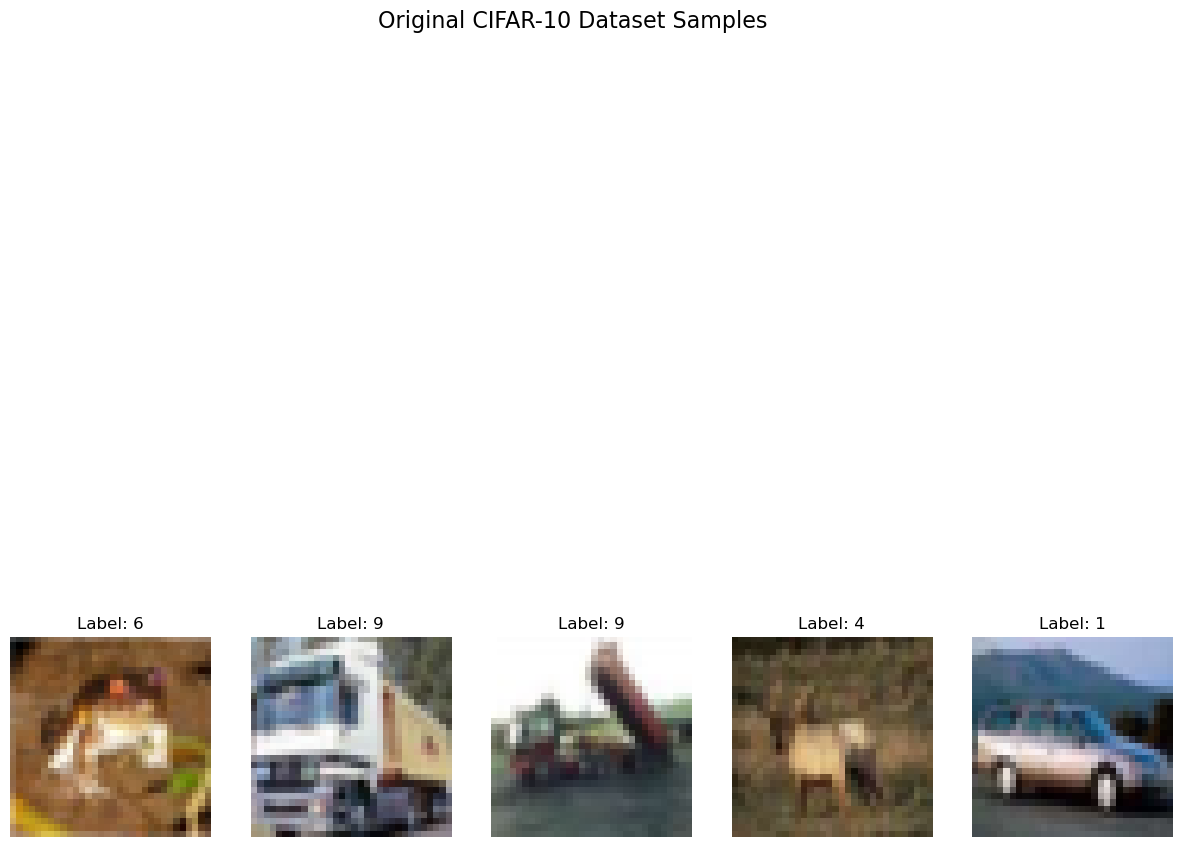

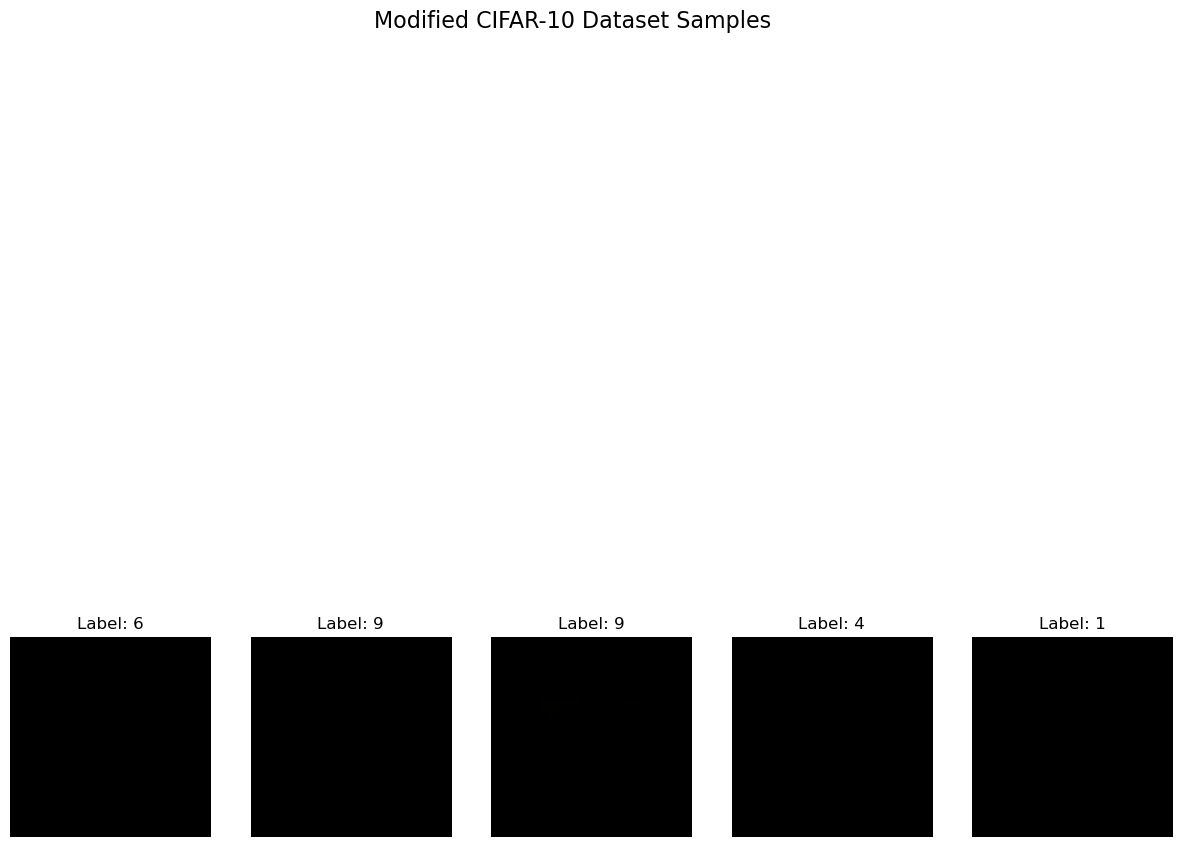

In [12]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Function to resize and pad images
def resize_and_pad(image, scale_factor=0.50):
    height, width, channels = image.shape
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    pad_height = (height - new_height) // 2
    pad_width = (width - new_width) // 2

    padded_image = np.zeros((height, width, channels), dtype=np.uint8)
    padded_image[pad_height:pad_height+new_height, pad_width:pad_width+new_width] = resized_image

    return padded_image.astype('float32') / 255.0

# Modify the training and test data
x_train_modified = np.array([resize_and_pad(image) for image in x_train])
x_test_modified = np.array([resize_and_pad(image) for image in x_test])

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test)

# Define the model
def build_model(input_shape=(32, 32, 3)):
    base_model = ResNet50(weights=None, include_top=False, input_tensor=Input(shape=input_shape))
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(10, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Training function
def train_model(model, x_train, y_train, batch_size=64, epochs=10):
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Evaluation function
def evaluate_model(model, x_test, y_test):
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    return accuracy * 100

# Train and evaluate models
model_original = build_model()
train_model(model_original, x_train, y_train, epochs=10)
original_on_original_acc = evaluate_model(model_original, x_test, y_test)
original_on_modified_acc = evaluate_model(model_original, x_test_modified, y_test)

model_modified = build_model()
train_model(model_modified, x_train_modified, y_train, epochs=10)
modified_on_original_acc = evaluate_model(model_modified, x_test, y_test)
modified_on_modified_acc = evaluate_model(model_modified, x_test_modified, y_test)

print(f'Model trained on original, tested on original CIFAR-10 test accuracy: {original_on_original_acc:.2f}%')
print(f'Model trained on original, tested on modified CIFAR-10 test accuracy: {original_on_modified_acc:.2f}%')
print(f'Model trained on modified, tested on original CIFAR-10 test accuracy: {modified_on_original_acc:.2f}%')
print(f'Model trained on modified, tested on modified CIFAR-10 test accuracy: {modified_on_modified_acc:.2f}%')

# Visualize a few images from both datasets
def show_images(images, labels, title):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 15))
    fig.suptitle(title, fontsize=16) 
    for img, label, ax in zip(images, labels, axes):
        ax.imshow(img)
        ax.set_title(f'Label: {label}')
        ax.axis('off')
    plt.show()

# Display original dataset samples
show_images(x_train[:5], np.argmax(y_train[:5], axis=1), 'Original CIFAR-10 Dataset Samples') 
 
# Display modified dataset samples
show_images(x_train_modified[:5], np.argmax(y_train[:5], axis=1), 'Modified CIFAR-10 Dataset Samples')

Epoch 1/10
625/625 [==============================] - 739s 1s/step - loss: 1.9917 - accuracy: 0.2761 - val_loss: 1.7041 - val_accuracy: 0.3861
Epoch 2/10
625/625 [==============================] - 712s 1s/step - loss: 1.6271 - accuracy: 0.4030 - val_loss: 1.5543 - val_accuracy: 0.4243
Epoch 3/10
625/625 [==============================] - 710s 1s/step - loss: 1.5715 - accuracy: 0.4374 - val_loss: 1.5515 - val_accuracy: 0.4220
Epoch 4/10
625/625 [==============================] - 710s 1s/step - loss: 1.4582 - accuracy: 0.4816 - val_loss: 1.2821 - val_accuracy: 0.5403
Epoch 5/10
625/625 [==============================] - 709s 1s/step - loss: 1.3191 - accuracy: 0.5457 - val_loss: 1.5057 - val_accuracy: 0.5387
Epoch 6/10
625/625 [==============================] - 731s 1s/step - loss: 1.2239 - accuracy: 0.5821 - val_loss: 1.6669 - val_accuracy: 0.4331
Epoch 7/10
625/625 [==============================] - 708s 1s/step - loss: 1.4375 - accuracy: 0.4950 - val_loss: 1.4065 - val_accuracy: 0.5150

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Model trained on original, tested on original CIFAR-10 test accuracy: 48.44%
Model trained on original, tested on modified CIFAR-10 test accuracy: 13.79%
Model trained on modified, tested on original CIFAR-10 test accuracy: 13.80%
Model trained on modified, tested on modified CIFAR-10 test accuracy: 33.63%


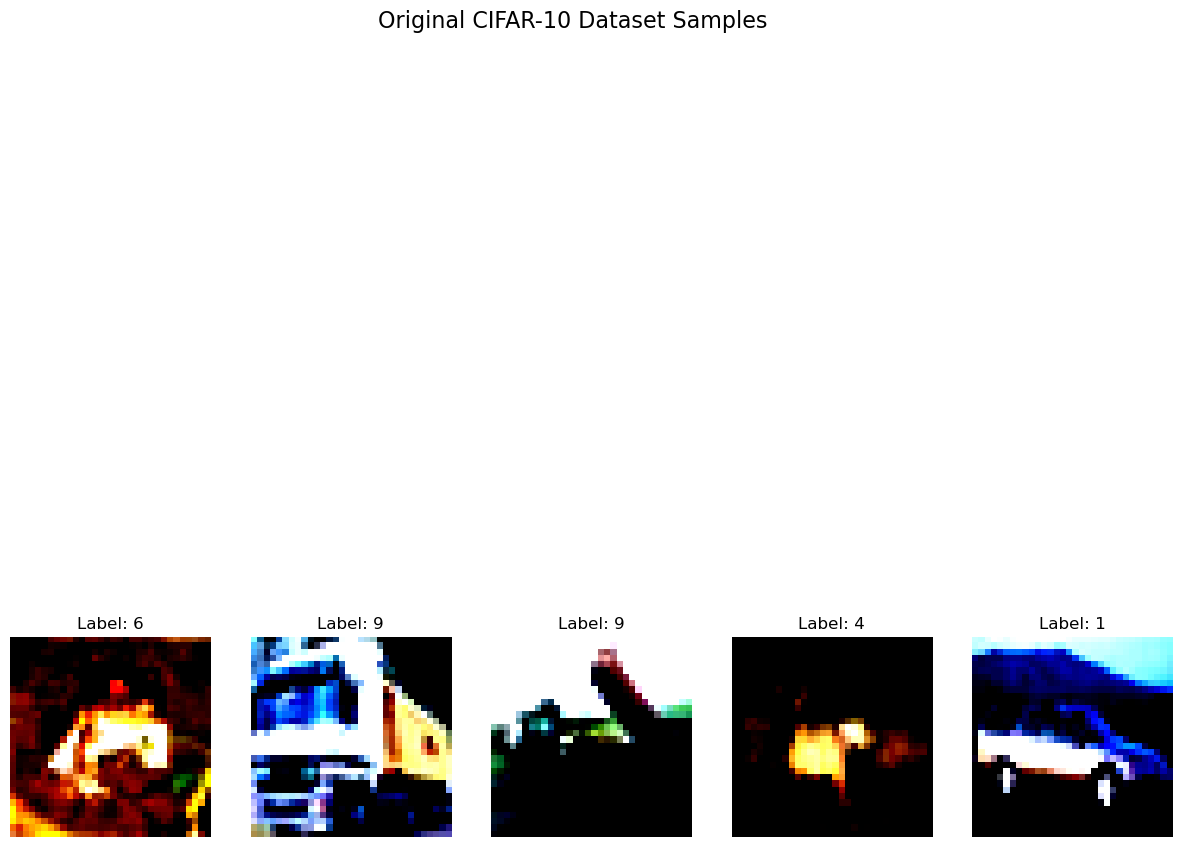

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


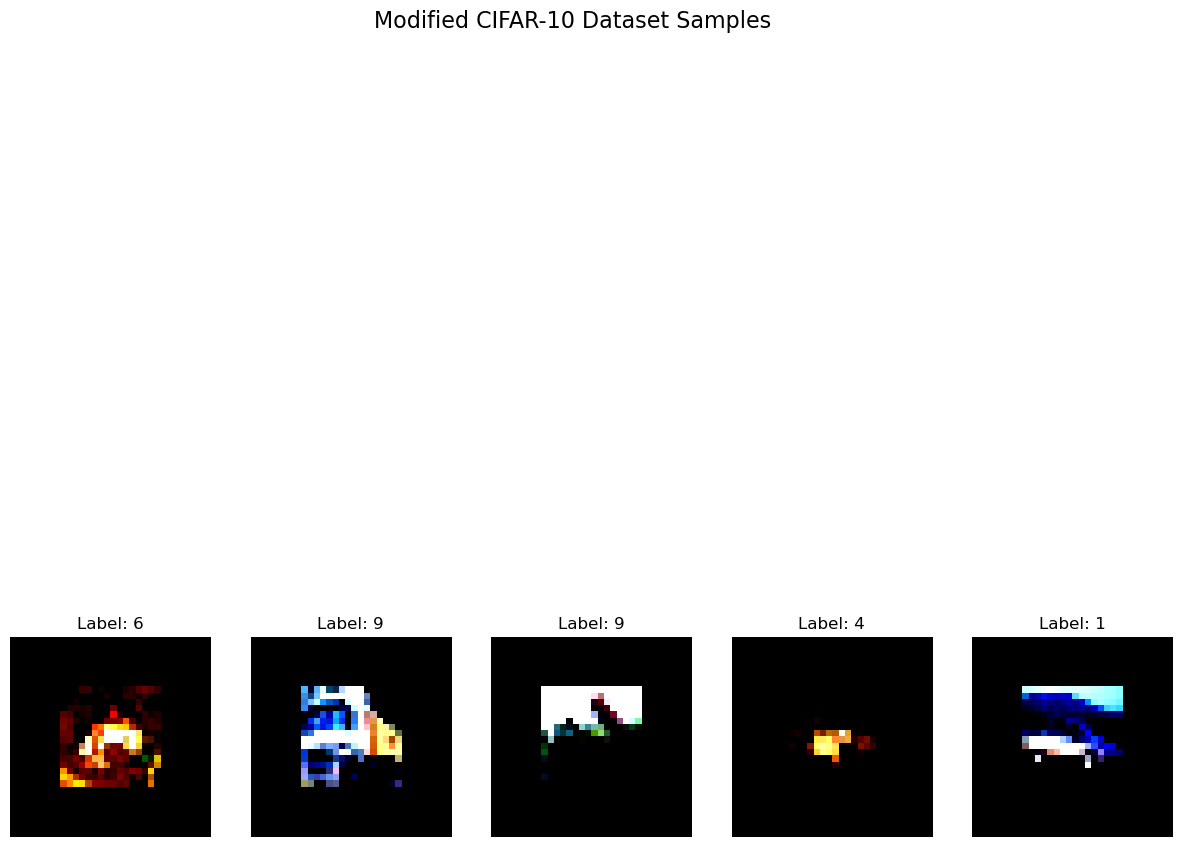

In [13]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Function to resize and pad images
def resize_and_pad(image, scale_factor=0.50):
    height, width, channels = image.shape
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Calculate the padding required to maintain the original aspect ratio
    pad_height = (height - new_height) // 2
    pad_width = (width - new_width) // 2

    # Create a new padded image with the same size as the original image
    padded_image = np.zeros((height, width, channels), dtype=np.uint8)

    # Paste the resized image onto the padded image
    padded_image[pad_height:pad_height + new_height, pad_width:pad_width + new_width] = resized_image

    return padded_image.astype('float32')

# Modify the training and test data
x_train_modified = np.array([resize_and_pad(image) for image in x_train])
x_test_modified = np.array([resize_and_pad(image) for image in x_test])

# Normalize images
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train_modified = x_train_modified / 255.0
x_test_modified = x_test_modified / 255.0

# Normalize images with ImageNet means and standard deviations
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

def normalize_images(images):
    images = (images - mean) / std
    return images

x_train = normalize_images(x_train)
x_test = normalize_images(x_test)
x_train_modified = normalize_images(x_train_modified)
x_test_modified = normalize_images(x_test_modified)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the model
def build_model(input_shape=(32, 32, 3)):
    base_model = ResNet50(weights=None, include_top=False, input_tensor=Input(shape=input_shape))
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(10, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Training function
def train_model(model, x_train, y_train, batch_size=64, epochs=10):
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Evaluation function
def evaluate_model(model, x_test, y_test):
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    return accuracy * 100

# Train and evaluate models
model_original = build_model()
train_model(model_original, x_train, y_train, epochs=10)
original_on_original_acc = evaluate_model(model_original, x_test, y_test)
original_on_modified_acc = evaluate_model(model_original, x_test_modified, y_test)

model_modified = build_model()
train_model(model_modified, x_train_modified, y_train, epochs=10)
modified_on_original_acc = evaluate_model(model_modified, x_test, y_test)
modified_on_modified_acc = evaluate_model(model_modified, x_test_modified, y_test)

print(f'Model trained on original, tested on original CIFAR-10 test accuracy: {original_on_original_acc:.2f}%')
print(f'Model trained on original, tested on modified CIFAR-10 test accuracy: {original_on_modified_acc:.2f}%')
print(f'Model trained on modified, tested on original CIFAR-10 test accuracy: {modified_on_original_acc:.2f}%')
print(f'Model trained on modified, tested on modified CIFAR-10 test accuracy: {modified_on_modified_acc:.2f}%')

# Visualize a few images from both datasets
def show_images(images, labels, title):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 15))
    fig.suptitle(title, fontsize=16)
    for img, label, ax in zip(images, labels, axes):
        ax.imshow(img)
        ax.set_title(f'Label: {label}')
        ax.axis('off')
    plt.show()

# Display original dataset samples
show_images(x_train[:5], np.argmax(y_train[:5], axis=1), 'Original CIFAR-10 Dataset Samples')

# Display modified dataset samples
show_images(x_train_modified[:5], np.argmax(y_train[:5], axis=1), 'Modified CIFAR-10 Dataset Samples')

GPUs available: 0
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Epoch 1/10
625/625 [==============================] - 716s 1s/step - loss: 1.9953 - accuracy: 0.2839 - val_loss: 1.6358 - val_accuracy: 0.3876
Epoch 2/10
625/625 [==============================] - 689s 1s/step - loss: 1.6243 - accuracy: 0.4115 - val_loss: 1.4155 - val_accuracy: 0.4627
Epoch 3/10
625/625 [==============================] - 692s 1s/step - loss: 1.5790 - accuracy: 0.4306 - val_loss: 1.5114 - val_accuracy: 0.4506
Epoch 4/10
625/625 [==============================] - 691s 1s/step - loss: 1.3983 - accuracy: 0.5085 - val_loss: 1.3501 - val_accuracy: 0.5161
Epoch 5/10
625/625 [==============================] - 689s 1s/step - loss: 1.5127 - accuracy: 0.4677 - val_loss: 1.5842 - val_accuracy: 0.4197
Epoch 6/10
625/625 [==============================] - 694s 1s/step - loss: 1.4806 - accuracy: 0.4727 - val_loss: 1.7151 - val_accuracy: 0.4387
Epoch 7/10
625/625 [==

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Model trained on original, tested on original CIFAR-10 test accuracy: 55.58%
Model trained on original, tested on modified CIFAR-10 test accuracy: 16.31%
Model trained on modified, tested on original CIFAR-10 test accuracy: 19.83%
Model trained on modified, tested on modified CIFAR-10 test accuracy: 29.51%


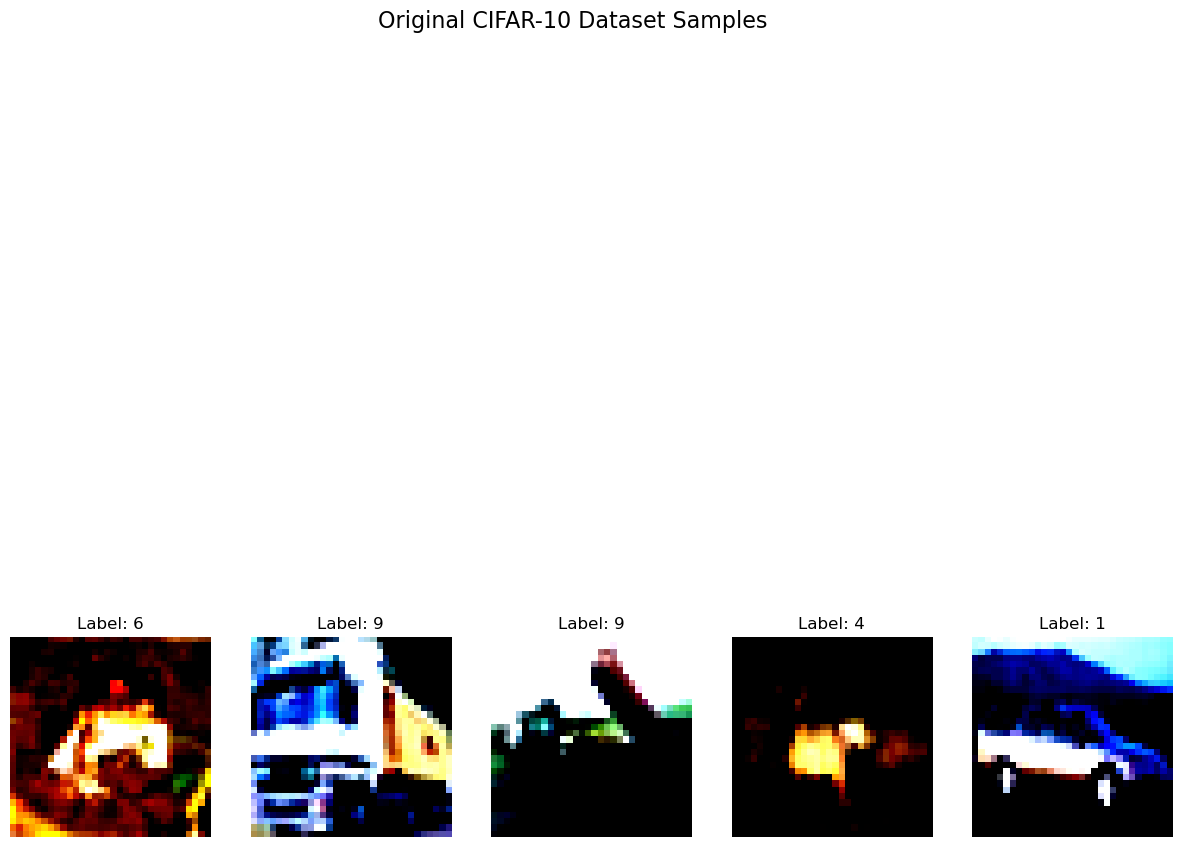

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


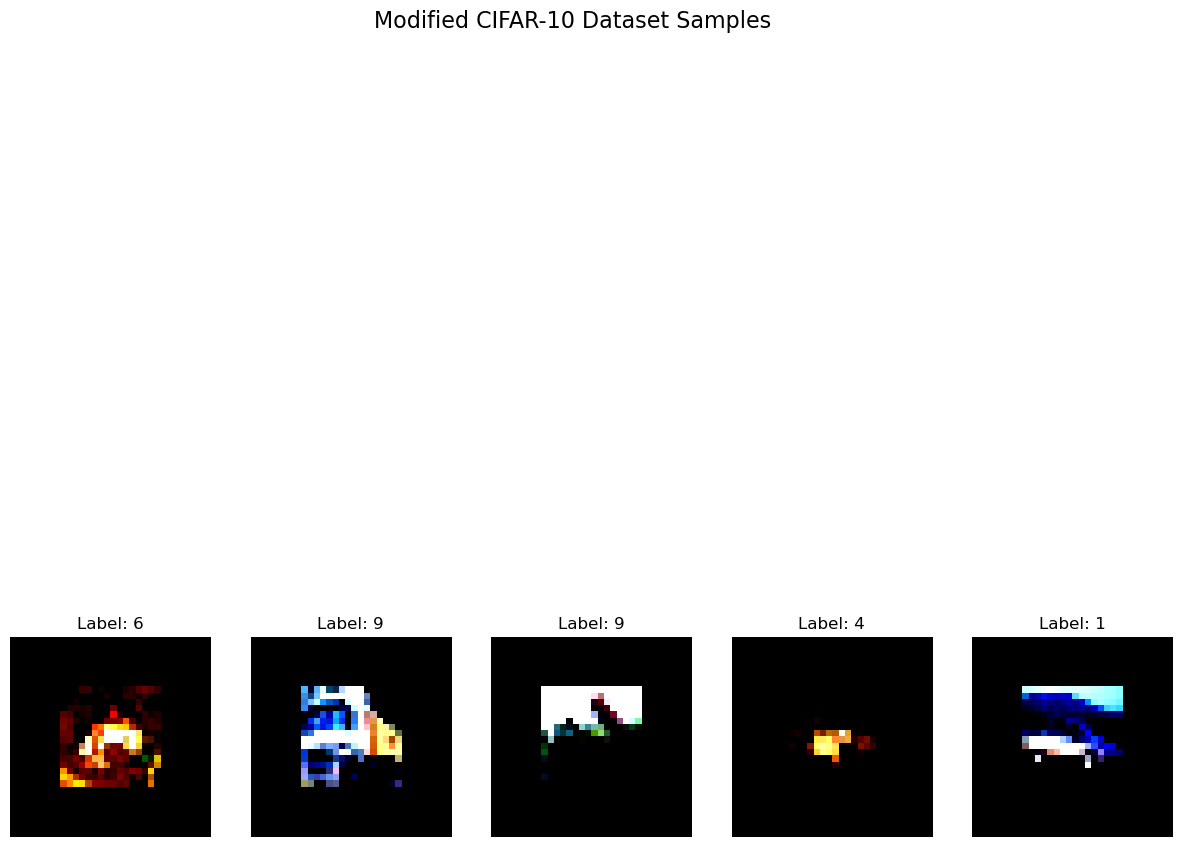

In [14]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10

# Check available GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')
print(f'GPUs available: {len(gpus)}')

# Enable memory growth for GPUs
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Function to resize and pad images
def resize_and_pad(image, scale_factor=0.50):
    height, width, channels = image.shape
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Calculate the padding required to maintain the original aspect ratio
    pad_height = (height - new_height) // 2
    pad_width = (width - new_width) // 2

    # Create a new padded image with the same size as the original image
    padded_image = np.zeros((height, width, channels), dtype=np.uint8)

    # Paste the resized image onto the padded image
    padded_image[pad_height:pad_height + new_height, pad_width:pad_width + new_width] = resized_image

    return padded_image.astype('float32')

# Modify the training and test data
x_train_modified = np.array([resize_and_pad(image) for image in x_train])
x_test_modified = np.array([resize_and_pad(image) for image in x_test])

# Normalize images
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train_modified = x_train_modified / 255.0
x_test_modified = x_test_modified / 255.0

# Normalize images with ImageNet means and standard deviations
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

def normalize_images(images):
    images = (images - mean) / std
    return images

x_train = normalize_images(x_train)
x_test = normalize_images(x_test)
x_train_modified = normalize_images(x_train_modified)
x_test_modified = normalize_images(x_test_modified)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the model
def build_model(input_shape=(32, 32, 3)):
    base_model = ResNet50(weights=None, include_top=False, input_tensor=Input(shape=input_shape))
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(10, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Training function
def train_model(strategy, x_train, y_train, batch_size=64, epochs=10):
    with strategy.scope():
        model = build_model()
        model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    return model

# Evaluation function
def evaluate_model(model, x_test, y_test):
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    return accuracy * 100

# Use MirroredStrategy for multi-GPU training
strategy = tf.distribute.MirroredStrategy()

# Train and evaluate models
model_original = train_model(strategy, x_train, y_train, epochs=10)
original_on_original_acc = evaluate_model(model_original, x_test, y_test)
original_on_modified_acc = evaluate_model(model_original, x_test_modified, y_test)

model_modified = train_model(strategy, x_train_modified, y_train, epochs=10)
modified_on_original_acc = evaluate_model(model_modified, x_test, y_test)
modified_on_modified_acc = evaluate_model(model_modified, x_test_modified, y_test)

print(f'Model trained on original, tested on original CIFAR-10 test accuracy: {original_on_original_acc:.2f}%')
print(f'Model trained on original, tested on modified CIFAR-10 test accuracy: {original_on_modified_acc:.2f}%')
print(f'Model trained on modified, tested on original CIFAR-10 test accuracy: {modified_on_original_acc:.2f}%')
print(f'Model trained on modified, tested on modified CIFAR-10 test accuracy: {modified_on_modified_acc:.2f}%')

# Visualize a few images from both datasets
def show_images(images, labels, title):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 15))
    fig.suptitle(title, fontsize=16)
    for img, label, ax in zip(images, labels, axes):
        ax.imshow(img)
        ax.set_title(f'Label: {label}')
        ax.axis('off')
    plt.show()

# Display original dataset samples
show_images(x_train[:5], np.argmax(y_train[:5], axis=1), 'Original CIFAR-10 Dataset Samples')

# Display modified dataset samples
show_images(x_train_modified[:5], np.argmax(y_train[:5], axis=1), 'Modified CIFAR-10 Dataset Samples')